<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Unsupervised_Learning/DBSCAN/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DBSCAN Implementation
##Introduction

DBCSAN stands for Density Based Spacial Clustering of Applications with Noise. It is a clustering algorithm which does not suffer from trending towards the "call-like" clusters of k-means.

To implement DBSCAN, you identify a few core points in the data and expand the cluster by including all points that are a certain distance (epsilon) away from the core. Any point with more than a certain number of nearby points (min_points) becomes a new core from which to expand. Any point which more than epsilon distance away from a core point to connect to it's cluster is considered noise.

## Imports and Data Loading

In this example, we'll use the simple Iris dataset (contianing information about different flower species) to make our groups.

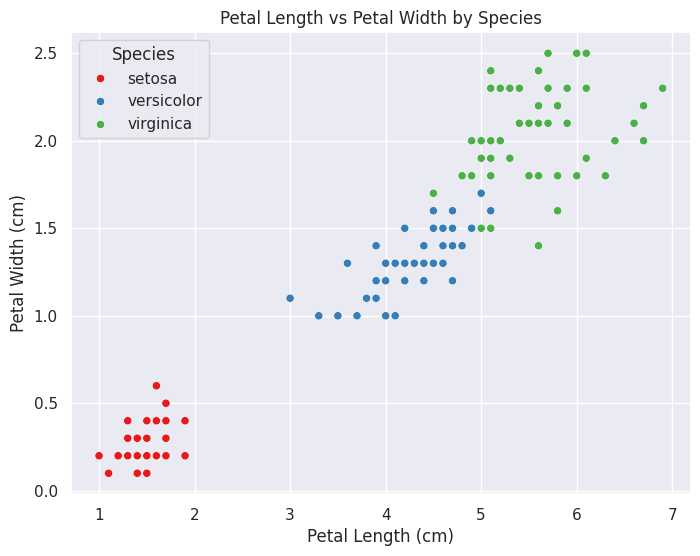

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

iris = sns.load_dataset("iris")
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
y = iris.species.to_numpy()

iris.species.unique()

plt.figure(figsize=(8, 6))

# Scatter plot with different colors for each species
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species", palette="Set1")

# Adding titles and labels
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Show legend (which is done automatically by hue)
plt.legend(title="Species")

# Display the plot
plt.show()

The plot above shows the 3 species of flower grouped by their petal dimensions. Versicolor and virginica have some overlap, while setosa is pretty clearly separated. However, since this is an unsivervised learning strategy, our model won't actually know these labels- it will see the data as only one color and try to pick out its own groupings.

## Implement DBSCAN and Visualize Results

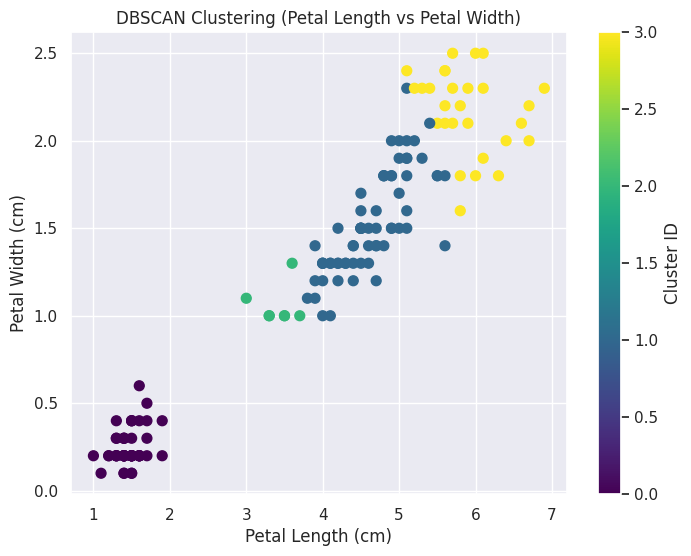

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset and extract the relevant columns (petal_length and petal_width)
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and petal width
y = iris.target

# Parameters for DBSCAN
eps = 1  # Maximum distance between two points to be considered neighbors
min_samples = 10  # Minimum number of points to form a dense region (core point)

# Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Step 1: Calculate pairwise distances (distance matrix)
def calculate_distances(X):
    distances = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(i, X.shape[0]):
            dist = euclidean_distance(X[i], X[j])
            distances[i, j] = dist
            distances[j, i] = dist
    return distances

# Step 2: Identify core points
def find_core_points(X, eps, min_samples):
    distances = calculate_distances(X)
    core_points = []
    for i in range(X.shape[0]):
        # Find all points within eps distance of point i
        neighbors = np.where(distances[i] <= eps)[0]
        if len(neighbors) >= min_samples:
            core_points.append(i)
    return core_points

# Step 3: Expand clusters from core points
def expand_cluster(X, distances, core_points, eps, min_samples, labels):
    cluster_id = 0
    visited = set()

    for point_idx in core_points:
        if point_idx in visited:
            continue

        # Start a new cluster
        cluster_points = [point_idx]
        visited.add(point_idx)
        labels[point_idx] = cluster_id

        # Expand cluster by checking neighbors of core points
        neighbors = np.where(distances[point_idx] <= eps)[0]

        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                labels[neighbor] = cluster_id
                if neighbor in core_points:
                    cluster_points.append(neighbor)

        # After expanding, increment the cluster id
        cluster_id += 1

    return labels

# Step 4: Label noise points
def dbscan(X, eps, min_samples):
    distances = calculate_distances(X)
    labels = -1 * np.ones(X.shape[0])  # Start with all points labeled as noise (-1)

    # Step 2: Identify core points
    core_points = find_core_points(X, eps, min_samples)

    # Step 3: Expand clusters from core points
    labels = expand_cluster(X, distances, core_points, eps, min_samples, labels)

    return labels

# Run DBSCAN
labels = dbscan(X, eps, min_samples)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering (Petal Length vs Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.colorbar(label='Cluster ID')
plt.show()


It looks like with an epsilon value of 1 (distance away from a core points to be considered a neighbor) and a min_samples value of 10 (number of points neighboring eachother to count as a dense region with a core point), this model ended up with 4 distinct groups and no noise. Noise would be outliers, indicated on the color scale as -1. The first cluster identified is cluster 0, the purple section we would recognize as setosa. In the top right region, the model identified 3 more clusters with the given parameters with IDs of 1, 2, and 3.

---
## Visualize Various Model Parameters

What would the model have come up with had we used different epsilon values? Or different min_samples values? See below for plots comparing the results.

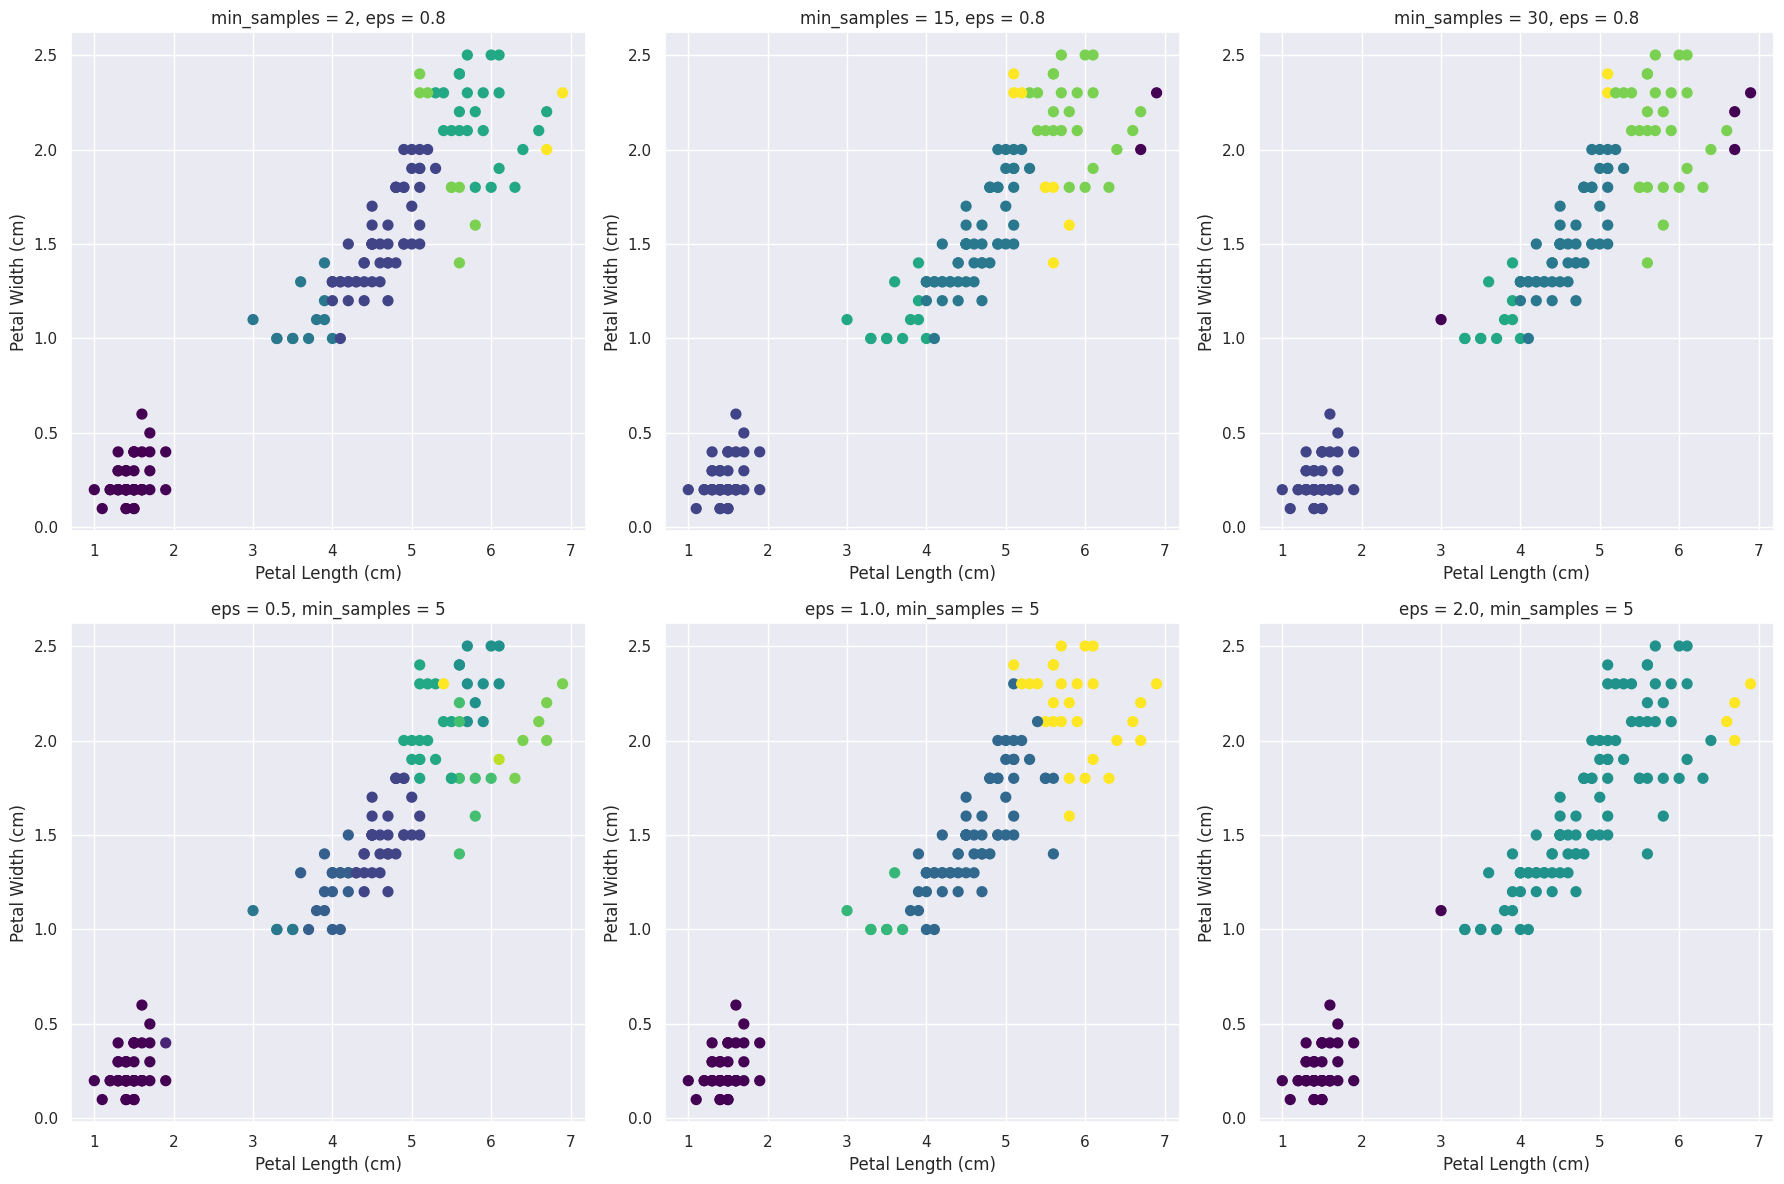

In [6]:
# Create a grid of plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Set of min_samples values to experiment with (while eps is fixed)
min_samples_values = [2, 15, 30]
eps_value = 0.8

# Set of eps values to experiment with (while min_samples is fixed)
eps_values = [0.5, 1.0, 2.0]
min_samples_value = 5

# Plot 1-3: Varying min_samples while keeping eps constant
for i, min_samples in enumerate(min_samples_values):
    labels = dbscan(X, eps_value, min_samples)
    axes[0, i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    axes[0, i].set_title(f"min_samples = {min_samples}, eps = {eps_value}")
    axes[0, i].set_xlabel('Petal Length (cm)')
    axes[0, i].set_ylabel('Petal Width (cm)')

# Plot 4-6: Varying eps while keeping min_samples constant
for i, eps in enumerate(eps_values):
    labels = dbscan(X, eps, min_samples_value)
    axes[1, i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    axes[1, i].set_title(f"eps = {eps}, min_samples = {min_samples_value}")
    axes[1, i].set_xlabel('Petal Length (cm)')
    axes[1, i].set_ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()

It looks like changing the number of samples required to have a dense area didn't have a significant impact on the model until about 30, which looks like it may have given us some outliers. The epsilon value did not need to change as much to have a bigger impact- a low value resulted in what looks like 9 groups while increasing it to just a distance of 2 yeilded only 3 groups, which matches the number of flower species we had in the data although it is split a bit differently.

Overall, this model was pretty reliable at picking out the setosa group but had varying results on the other two species depending on given starting parameters.